In [1]:
!pip install mediapipe opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 45.3 MB/s eta 0:00:00


Left Eyebrow Average Distance: 60.957695551317585
Right Eyebrow Average Distance: 60.45762227922886
Expression: Neutral/Other


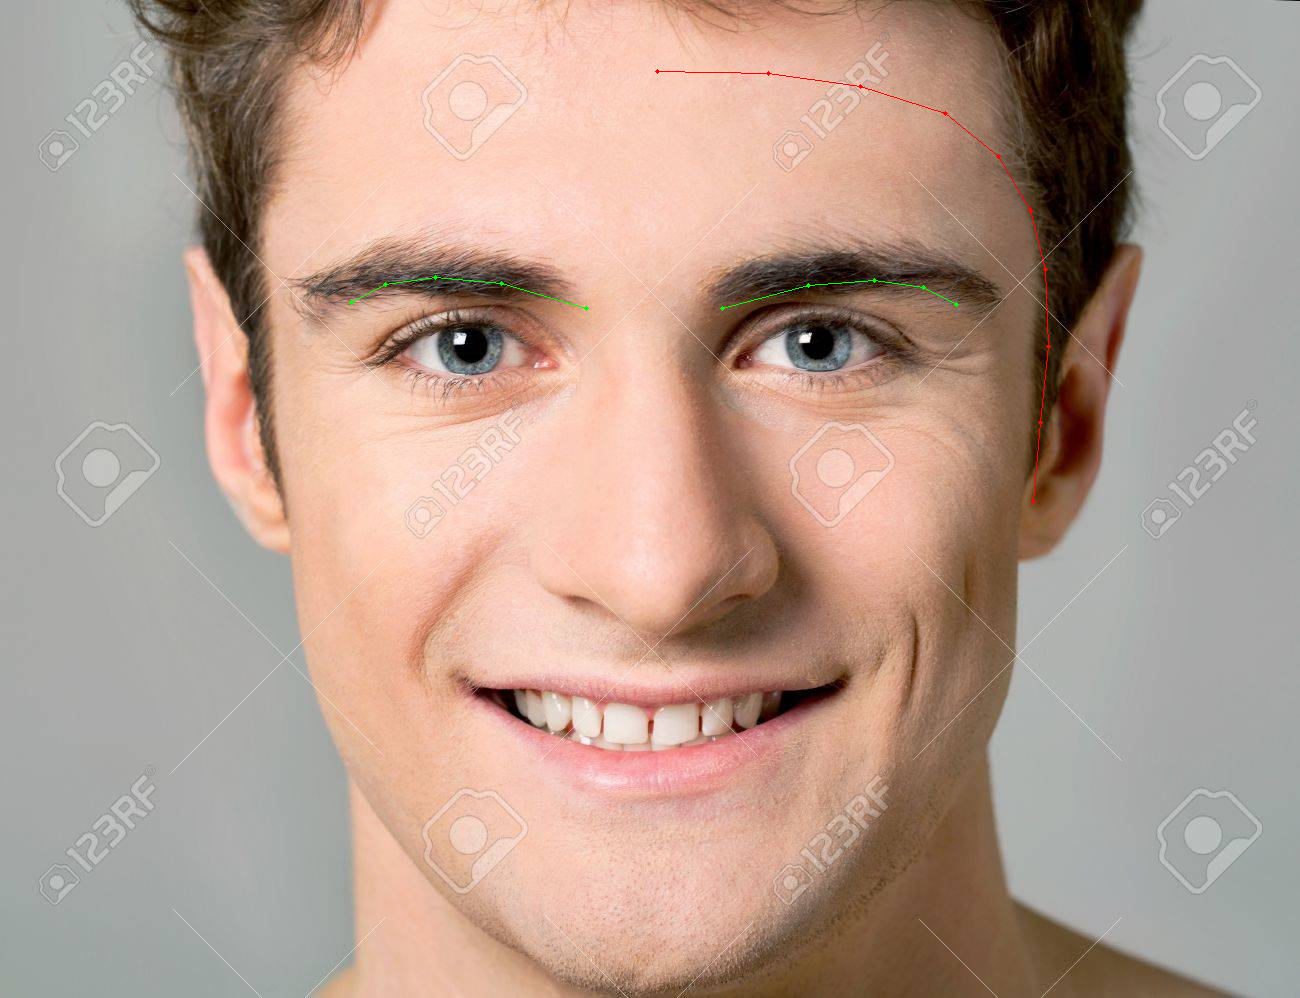

In [3]:
import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow

# Pass your image path from drive
image_path = '/content/48967698-human-face.jpg'

# Initialize Mediapipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()

def analyze_image(image_path):
    # Load an image
    image = cv2.imread(image_path)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect facial landmarks
    results = face_mesh.process(rgb_image)

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            # Extract eyebrow landmarks
            left_eyebrow_indices = [55, 65, 52, 53, 46]
            right_eyebrow_indices = [285, 295, 282, 283, 276]

            left_eyebrow_points = []
            right_eyebrow_points = []

            for idx in left_eyebrow_indices:
                x = int(face_landmarks.landmark[idx].x * image.shape[1])
                y = int(face_landmarks.landmark[idx].y * image.shape[0])
                left_eyebrow_points.append((x, y))
                cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

            for idx in right_eyebrow_indices:
                x = int(face_landmarks.landmark[idx].x * image.shape[1])
                y = int(face_landmarks.landmark[idx].y * image.shape[0])
                right_eyebrow_points.append((x, y))
                cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

            # Draw the eyebrows by connecting the points
            left_eyebrow = np.array(left_eyebrow_points, np.int32)
            right_eyebrow = np.array(right_eyebrow_points, np.int32)
            cv2.polylines(image, [left_eyebrow], False, (0, 255, 0), 1)
            cv2.polylines(image, [right_eyebrow], False, (0, 255, 0), 1)

            # Extract forehead line points
            forehead_indices = [10, 338, 297, 332, 284, 251, 389, 356, 454, 323]

            forehead_points = []

            for idx in forehead_indices:
                x = int(face_landmarks.landmark[idx].x * image.shape[1])
                y = int(face_landmarks.landmark[idx].y * image.shape[0])
                forehead_points.append((x, y))
                cv2.circle(image, (x, y), 2, (0, 0, 255), -1)

            # Draw the forehead lines by connecting the points
            forehead_line = np.array(forehead_points, np.int32)
            cv2.polylines(image, [forehead_line], False, (0, 0, 255), 1)

            # Analyze the Eyebrows
            def analyze_eyebrow(eyebrow_points):
                distances = []
                for i in range(1, len(eyebrow_points)):
                    dist = np.linalg.norm(np.array(eyebrow_points[i - 1]) - np.array(eyebrow_points[i]))
                    distances.append(dist)
                avg_distance = np.mean(distances)
                return avg_distance

            left_eyebrow_avg_distance = analyze_eyebrow(left_eyebrow_points)
            right_eyebrow_avg_distance = analyze_eyebrow(right_eyebrow_points)

            print(f'Left Eyebrow Average Distance: {left_eyebrow_avg_distance}')
            print(f'Right Eyebrow Average Distance: {right_eyebrow_avg_distance}')

            # Determine Expression (Example Rule)
            if left_eyebrow_avg_distance < 15 and right_eyebrow_avg_distance < 15:
                expression = "Angry"
            else:
                expression = "Neutral/Other"

            print(f'Expression: {expression}')

    # Display the output image
    cv2_imshow(image)
    cv2.waitKey(0)

# Analyze the image
analyze_image(image_path)
